In [1]:
# ez most tökéletesen működik 2024.05.10. 21:45
# új módon, importált TZ függvényekkel

####Ha Google Colabban futtatod, töltsd fel és csomagoltasd ki a "Flyball_input.zip" fájlt. Ha nem abban, lépd át ezeket a cellákat.

In [2]:
######### 240502 ######## Google Colab-ba fájlok feltöltése
from google.colab import files
import os

# Minden korábbi fájl és mappa törlése a Colab környezetben
files_and_folders = os.listdir()
for item in files_and_folders:
    if os.path.isfile(item):
        os.remove(item)

# Fájlok feltöltése
uploaded_files = files.upload()

# A feltöltött fájlok neveinek kinyerése
file_name = list(uploaded_files.keys())[0]

Saving Flyball_input.zip to Flyball_input.zip


In [3]:
### 240502 ### Google Colab-ban ZIP file kicsomagolása
from zipfile import ZipFile

with ZipFile(file_name, 'r') as zipfile2:
    zipfile2.extractall()
    print('Kicsomagolt fájlok:')
    for name in zipfile2.namelist():
        print(name)
    print('Done')

Kicsomagolt fájlok:
df_EFC_output.csv
df_CZ_output.csv
Wild_Runners_Flyball_Team_kutyak_alapadatai.xlsx
FLYBALLCZ_versenyadatok.xlsx
EFC_versenyadatok.xlsx
TZ_functions.py
df_EFC_CZ_track_good-date.csv
df_WRFT_output.csv
df_events.csv
df_EFC_CZ_post_analyzing_merged.csv
df_EFC_CZ_Weather.csv
Done


# alap importok és mindenféle megjelenítési beállítások, kikommentelve igény szerint:

In [4]:
from IPython.display import display, HTML
import numpy as np  # Új sor: NumPy importálása
import pandas as pd

# Beállítások
pd.set_option('display.max_rows', False)           # Az összes sor megjelenítése
pd.set_option('display.max_colwidth', None)        # Teljes méretű szöveges oszlopok
pd.set_option('display.expand_frame_repr', False)  # DataFrame vízszintes kiterjesztése kikapcsolva
pd.set_option('display.max_columns', 0)            # Az összes oszlop megjelenítése

In [5]:
import seaborn as sns
import numpy as np
import pandas as pd
import os
import shutil
sns.set(style="ticks")
seed=42
np.random.seed(seed)
#maximális oszlopszám megjelenítése
pd.options.display.max_columns = 20

In [6]:
display(HTML("<style>.container { width:100% !important; }</style>"))

In [7]:
pd.options.display.max_colwidth =300

# SAJÁT FÜGGVÉNYEK:

In [17]:
# betöltöm a 'TZ_functions.py' fájlban található saját gyártású, rendszeresen használt függvényeket
get_ipython().run_line_magic('run', 'TZ_functions.py')

 ############### ADATDOKI függvényei   ############### 
 ############### TZ_functions.py       ############### 
 ############### version = 2024.05.11. ############### 
A li() függvény listázásnál, legyen alapértelmezett a sorok száma?
 0 = ne legyen, azaz listázáskor rákérdez. Vagy szám = ennyi sort listáz rákérdezés nélkül. ("enter" változó)5


#Adat importálások:

In [18]:
# most csak belenézünk az adatokba
import pandas as pd

excel_file_name = "Wild_Runners_Flyball_Team_kutyak_alapadatai.xlsx"

# Excel fájl beolvasása
df_WRFT = pd.read_excel(excel_file_name)

# Adatok megjelenítése
di(df_WRFT)

,felvezeto,nev,fajta,nem,ivar,szuletesi_datum,chip_szam,ulna_hossz,ugrasi_magassag
0,TM800418,Dexter,Kooikerhondje,kan,ivartalan,2010-02-14,93900005238999,14.050,25.0
1,NP950613,Jasper,Border Collie,kan,ivartalan,2011-03-28,93900007189034,16.560,30.0
2,UF830429,Angie,Border,szuka,ivartalan,2014-02-06,93900003827629,15.220,27.5
3,ZE801127,Alex,Border Collie,kan,ivartalan,2014-04-22,93900003598960,17.950,32.5
4,DP910919,Ashley,border collie,szuka,ivartalan,2015-01-26,93900009738344,18.300,32.5
5,OJ941014,Bella,American Staffordshire Terrier,szuka,ivartalan,2015-02-27,93900009320601,14.700,25.0
6,HO800728,Gordon,Jack Russell Terrier,kan,ivartalan,2015-04-12,93900001569304,9.670,15.0
7,UR870607,Negro,Keverék,kan,ivartalan,2015-04-14,93900002110777,15.770,27.5
8,RK871018,Fibo,Magyar Vizsla,kan,ivartalan,2015-05-21,93900001757525,17.990,32.5
9,PO831026,Agnes,Border Collie,szuka,ivartalan,2015-09-24,93900007138387,18.020,32.5


In [19]:
# 240503 kilistázza a dataframe tulajdonságait
dinfo(df_WRFT)


DataFrame oszlopainak statisztikái:


,#,Dtype,count,unique,top,freq,mean,std,min,25%,50%,75%,max,first,last,NaN_count,unique_top,unique_top_count
felvezeto,1,object,51,51,TM800418,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TM800418,UH881130,0,TM800418,1
nev,2,object,51,51,Dexter,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dexter,Hank,0,Dexter,1
fajta,3,object,51,19,Border Collie,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kooikerhondje,Keverék,0,Border Collie,15
nem,4,object,51,2,kan,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,kan,kan,0,kan,30
ivar,5,object,51,2,ivartalan,41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ivartalan,ivaros,0,ivartalan,41
szuletesi_datum,6,datetime64[ns],51,NaN,NaN,NaN,2018-02-01 16:56:28.235294208,NaN,2010-02-14 00:00:00,2016-03-29 12:00:00,2018-03-08 00:00:00,2020-06-30 12:00:00,2022-05-02 00:00:00,2010-02-14 00:00:00,2022-05-02 00:00:00,0,2018-12-22 00:00:00,2
chip_szam,7,int64,51.0,NaN,NaN,NaN,93900005643998.296875,2736044.980155,93900001206699.0,93900003542806.5,93900005539134.0,93900008311913.0,93900009884426.0,93900005238999,93900008222471,0,93900005238999,1
ulna_hossz,8,float64,51.0,NaN,NaN,NaN,21.173922,29.46489,1.209,14.96,16.28,17.775,175.5,14.05,16.28,0,16.56,2
ugrasi_magassag,9,float64,51.0,NaN,NaN,NaN,28.039216,4.281172,15.0,26.25,27.5,32.5,32.5,25.0,27.5,0,27.5,14


# Látszik néhány korrigálandó dolog, fogjunk hozzá:

In [20]:
# ez most tökéletesen működik 2024.05.05. 10:20 ez jó
# itt nem szükséges minden rész, de közöset használok mindegyik importhoz
import pandas as pd
from datetime import datetime
from IPython.display import display, HTML

def di(pr):
    display(HTML(pr.to_html()))

def process_excel_file(df, first_cell_value):
    try:
        # Az első sor adatainak beszúrása minden sorba a DataFrame utolsó oszlopa utáni oszlopba, ez itt nem kell csak a másik két Excelnél.
        # df.insert(len(df.columns), 'event_place', first_cell_value)

        # "." -> "," csere az "ulna hossz" és "ugrási magasság" oszlopokban
        for col in ['ulna hossz', 'ugrasi magassag']:
            if col in df.columns:
                df[col] = df[col].astype(str).str.replace(',', '.').astype(float)

        # "szuletesi datum" konvertálása dátum típusúvá
        df['szuletesi_datum'] = pd.to_datetime(df['szuletesi_datum'], errors='coerce')

        # Új oszlop létrehozása a mai év - "szuletesi_datum" értékkel
        df['kora'] = datetime.now().year - df['szuletesi_datum'].dt.year

        # 'chip_szam' típusának átalakítása objectre
        if 'chip_szam' in df.columns:
            df['chip_szam'] = df['chip_szam'].astype(str)

        # Visszatérés a feldolgozott DataFrame-mel
        return df

    except Exception as e:
        print(f"An error occurred: {e}")
        return None

def read_and_process_excel(file_name):
    # Fülek beolvasása
    loaded_sheets = read_excel_sheets(file_name)

    # Ellenőrzés, hogy sikeres volt-e a beolvasás
    if loaded_sheets:
        # Fülek feldolgozása és kiíratása
        for sheet_name, df in loaded_sheets.items():
            print(f"Processing Sheet: {sheet_name}")

            # Az első sor beolvasása
            df_first_row = pd.read_excel(file_name, sheet_name=sheet_name, nrows=1)
            first_cell_value = df_first_row.columns[1]

            processed_df = process_excel_file(df, first_cell_value)
            if processed_df is not None:
                di(processed_df)
                print("\n")
                return processed_df  # Visszaadjuk a feldolgozott DataFrame-et

    return None  # Ha nem volt feldolgozható adat, visszaadjuk a None-t

def read_excel_sheets(file_name):
    try:
        # ExcelFile objektum létrehozása az Excel-fájl betöltésével
        excel_file = pd.ExcelFile(file_name)

        # Fülek neveinek lekérdezése
        sheet_names = excel_file.sheet_names

        # Fülek beolvasása és tárolása egy szótárban
        dfs = {}
        for sheet_name in sheet_names:
            dfs[sheet_name] = pd.read_excel(excel_file, sheet_name=sheet_name)

        # ExcelFile bezárása
        excel_file.close()

        # Szótár visszaadása
        return dfs

    except FileNotFoundError:
        print(f"Error: File '{file_name}' not found.")
        return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Tesztelés
excel_file_name = "Wild_Runners_Flyball_Team_kutyak_alapadatai.xlsx"
df_WRFT = read_and_process_excel(excel_file_name)
#print(df_WRFT)
#print(type(df_WRFT))

Processing Sheet: Munkalap1


,felvezeto,nev,fajta,nem,ivar,szuletesi_datum,chip_szam,ulna_hossz,ugrasi_magassag,kora
0,TM800418,Dexter,Kooikerhondje,kan,ivartalan,2010-02-14,93900005238999,14.050,25.0,14
1,NP950613,Jasper,Border Collie,kan,ivartalan,2011-03-28,93900007189034,16.560,30.0,13
2,UF830429,Angie,Border,szuka,ivartalan,2014-02-06,93900003827629,15.220,27.5,10
3,ZE801127,Alex,Border Collie,kan,ivartalan,2014-04-22,93900003598960,17.950,32.5,10
4,DP910919,Ashley,border collie,szuka,ivartalan,2015-01-26,93900009738344,18.300,32.5,9
5,OJ941014,Bella,American Staffordshire Terrier,szuka,ivartalan,2015-02-27,93900009320601,14.700,25.0,9
6,HO800728,Gordon,Jack Russell Terrier,kan,ivartalan,2015-04-12,93900001569304,9.670,15.0,9
7,UR870607,Negro,Keverék,kan,ivartalan,2015-04-14,93900002110777,15.770,27.5,9
8,RK871018,Fibo,Magyar Vizsla,kan,ivartalan,2015-05-21,93900001757525,17.990,32.5,9
9,PO831026,Agnes,Border Collie,szuka,ivartalan,2015-09-24,93900007138387,18.020,32.5,9


In [21]:
    # Egyedi fajták kiírása
    unique_breeds = df_WRFT['fajta'].unique()
    print("Egyedi fajták:")
    for i, breed in enumerate(unique_breeds, 1):
        print(f"{i}. {breed}")

Egyedi fajták:
1. Kooikerhondje
2. Border Collie
3. Border
4. border collie
5. American Staffordshire Terrier
6. Jack Russell Terrier
7. Keverék
8. Magyar Vizsla
9. Mix
10. Australian Kelpie
11. Parson Russell terrier
12. Small schnauzer
13. Sheltie
14. BorderCollie
15. Australian Shepperd
16. Belgian shepherd - Malinois
17. Patterdale terrier
18. Mudi
19. Whippet


Ellenörzésre Excel-ből:
Kooikerhondje,
Border Collie,
American Staffordshire Terrier,
Jack Russell Terrier,
Magyar Vizsla,
Australian Kelpie,
Parson Russell terrier,
Small schnauzer,
Sheltie,
Australian Shepperd,
Belgian shepherd - Malinois,
Patterdale terrier,
Mudi,
Whippet,

In [22]:
# 2024.04.17. 17:58 jól működik kisbetű nagybetűre, mixre->keverék, "Border collie" és "Bordercollie" egyaránt
def rename_and_display(df, char_count):
    # Az új fajtanevek tárolása
    new_breeds = []

    # Eredeti fajták capitalizálása
    df['fajta_old'] = df['fajta']
    df['fajta'] = df['fajta'].str.capitalize()

    # "Bordercollie" cserélése "Border collie"-ra
    df['fajta'] = df['fajta'].str.replace("Bordercollie", "Border collie", case=False)

    # Minden fajta esetében
    for breed in df['fajta']:
        # Az első "char_count" karakter kiválasztása
        prefix = breed[:char_count]

        # Azonosítása a leghosszabb fajtának, ami a megadott prefix-szel kezdődik
        matching_breeds = [b for b in df['fajta'] if b.startswith(prefix)]
        longest_breed = max(matching_breeds, key=len)

        # A "Border collie" és "Bordercollie" egyaránt "Border collie"-ként való kezelése
        #if "Bordercollie" in longest_breed.lower():
        #    longest_breed = "Border collie"
        #ez miért nem működött?

        # Az "mix" és "keverék" egyaránt "keverék"-ként való kezelése
        if "mix" in longest_breed.lower() or "keverék" in longest_breed.lower():
            longest_breed = "Keverék"

        # Az új fajtanev hozzáadása a listához
        new_breeds.append(longest_breed)
        #print(longest_breed)

    # Az eredmény DataFrame létrehozása
    result_df = pd.DataFrame({'Eredeti': df['fajta_old'], 'Frissített': new_breeds})

    # Cserélendő fajták megjelenítése
    di(result_df.head(50))

    # Felhasználótól való jóváhagyás
    confirmation = "i" #input("Elfogadod a módosításokat? (i/n): ").lower(), csaak tesztelésnél kellett

    # Módosítások elfogadása esetén az "fajta" oszlop cseréje
    if confirmation == 'i':
        df['fajta'] = new_breeds
        print("Az 'fajta' oszlop sikeresen módosítva.")
    else:
        print("Módosítások elutasítva.")

    # Egyedi fajták kiírása
    unique_breeds = df['fajta'].unique()
    print("Egyedi fajták:")
    for i, breed in enumerate(unique_breeds, 1):
        print(f"{i}. {breed}")

# Tesztelés
char_count = 12
rename_and_display(df_WRFT, char_count)
di(df_WRFT)


,Eredeti,Frissített
0,Kooikerhondje,Kooikerhondje
1,Border Collie,Border collie
2,Border,Border collie
3,Border Collie,Border collie
4,border collie,Border collie
5,American Staffordshire Terrier,American staffordshire terrier
6,Jack Russell Terrier,Jack russell terrier
7,Keverék,Keverék
8,Magyar Vizsla,Magyar vizsla
9,Border Collie,Border collie


Az 'fajta' oszlop sikeresen módosítva.
Egyedi fajták:
1. Kooikerhondje
2. Border collie
3. American staffordshire terrier
4. Jack russell terrier
5. Keverék
6. Magyar vizsla
7. Australian kelpie
8. Parson russell terrier
9. Small schnauzer
10. Sheltie
11. Australian shepperd
12. Belgian shepherd - malinois
13. Patterdale terrier
14. Mudi
15. Whippet


,felvezeto,nev,fajta,nem,ivar,szuletesi_datum,chip_szam,ulna_hossz,ugrasi_magassag,kora,fajta_old
0,TM800418,Dexter,Kooikerhondje,kan,ivartalan,2010-02-14,93900005238999,14.050,25.0,14,Kooikerhondje
1,NP950613,Jasper,Border collie,kan,ivartalan,2011-03-28,93900007189034,16.560,30.0,13,Border Collie
2,UF830429,Angie,Border collie,szuka,ivartalan,2014-02-06,93900003827629,15.220,27.5,10,Border
3,ZE801127,Alex,Border collie,kan,ivartalan,2014-04-22,93900003598960,17.950,32.5,10,Border Collie
4,DP910919,Ashley,Border collie,szuka,ivartalan,2015-01-26,93900009738344,18.300,32.5,9,border collie
5,OJ941014,Bella,American staffordshire terrier,szuka,ivartalan,2015-02-27,93900009320601,14.700,25.0,9,American Staffordshire Terrier
6,HO800728,Gordon,Jack russell terrier,kan,ivartalan,2015-04-12,93900001569304,9.670,15.0,9,Jack Russell Terrier
7,UR870607,Negro,Keverék,kan,ivartalan,2015-04-14,93900002110777,15.770,27.5,9,Keverék
8,RK871018,Fibo,Magyar vizsla,kan,ivartalan,2015-05-21,93900001757525,17.990,32.5,9,Magyar Vizsla
9,PO831026,Agnes,Border collie,szuka,ivartalan,2015-09-24,93900007138387,18.020,32.5,9,Border Collie


In [23]:
dinfo(df_WRFT)


DataFrame oszlopainak statisztikái:


,#,Dtype,count,unique,top,freq,mean,std,min,25%,50%,75%,max,first,last,NaN_count,unique_top,unique_top_count
felvezeto,1,object,51,51,TM800418,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TM800418,UH881130,0,TM800418,1
nev,2,object,51,51,Dexter,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dexter,Hank,0,Dexter,1
fajta,3,object,51,15,Border collie,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kooikerhondje,Keverék,0,Border collie,26
nem,4,object,51,2,kan,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,kan,kan,0,kan,30
ivar,5,object,51,2,ivartalan,41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ivartalan,ivaros,0,ivartalan,41
szuletesi_datum,6,datetime64[ns],51,NaN,NaN,NaN,2018-02-01 16:56:28.235294208,NaN,2010-02-14 00:00:00,2016-03-29 12:00:00,2018-03-08 00:00:00,2020-06-30 12:00:00,2022-05-02 00:00:00,2010-02-14 00:00:00,2022-05-02 00:00:00,0,2018-12-22 00:00:00,2
chip_szam,7,object,51,51,93900005238999,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93900005238999,93900008222471,0,93900005238999,1
ulna_hossz,8,float64,51.0,NaN,NaN,NaN,21.173922,29.46489,1.209,14.96,16.28,17.775,175.5,14.05,16.28,0,16.56,2
ugrasi_magassag,9,float64,51.0,NaN,NaN,NaN,28.039216,4.281172,15.0,26.25,27.5,32.5,32.5,25.0,27.5,0,27.5,14
kora,10,int32,51.0,NaN,NaN,NaN,6.372549,2.660532,2.0,4.0,6.0,8.0,14.0,14,2,0,9,8


ilyen oszlopaink vannak: (csak a numerikusokról hisztogram)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   felvezeto        51 non-null     object        
 1   nev              51 non-null     object        
 2   fajta            51 non-null     object        
 3   nem              51 non-null     object        
 4   ivar             51 non-null     object        
 5   szuletesi_datum  51 non-null     datetime64[ns]
 6   chip_szam        51 non-null     object        
 7   ulna_hossz       51 non-null     float64       
 8   ugrasi_magassag  51 non-null     float64       
 9   kora             51 non-null     int32         
 10  fajta_old        51 non-null     object        
dtypes: datetime64[ns](1), float64(2), int32(1), object(7)
memory usage: 4.3+ KB


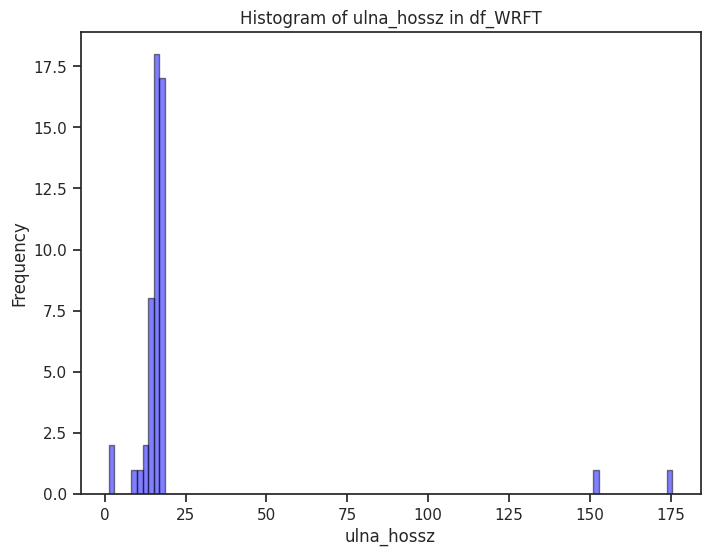

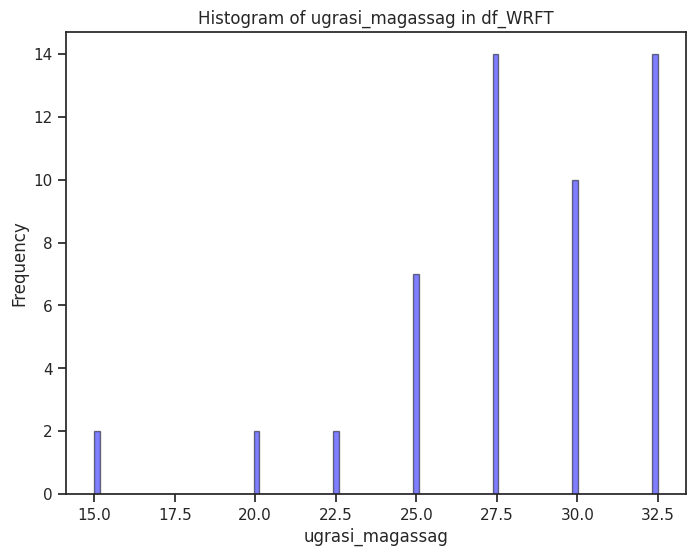

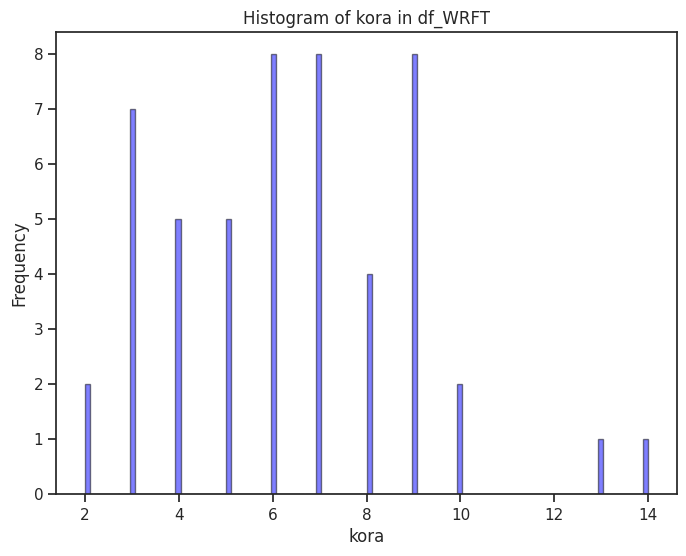

In [24]:
"""
240505
Ebben a kódban a plot_histograms függvényt definiáljuk, amely paraméterként várja a DataFrame nevét (dataframe_name).
A függvény megpróbálja betölteni a megadott DataFrame-et, és ha nem találja, hibát kezel.
Az iteráció és hisztogram kirajzolás része ugyanaz maradt. Most példa használatként megadhatod a DataFrame nevét a plot_histograms függvényben.
Ebben a kódban az `x_bin_width` és `y_bin_width` változókat 1%-os értékekre állítottam,
majd ezeket használtam a `bins` paraméterek megfelelő számának kiszámításához mind az X, mind az Y tengelyen.
`bin_width` értéke az adott oszlop MAX-MIN értékeinek megadott %-ától függ
"""

import pandas as pd
import matplotlib.pyplot as plt

def plot_histograms(dataframe_name):
    try:
        # Betöltjük a DataFrame-et a megadott név alapján
        df = globals()[dataframe_name]

        print("ilyen oszlopaink vannak: (csak a numerikusokról hisztogram)")
        df.info()

        # Iteráció az oszlopokon és hisztogramok kirajzolása
        for column in df.columns:
            # Csak numerikus oszlopokat veszünk figyelembe (elhagyjuk a nem numerikusakat)
            if pd.api.types.is_numeric_dtype(df[column]):
                # Számold ki a MAX és MIN értékek különbségének megadott %-át
                bin_width = 0.01 * (df[column].max() - df[column].min())
                # Készíts egyedi ábrát minden oszlophoz
                plt.figure(figsize=(8, 6))

                # Készíts hisztogramot a számolt bin-szélességgel
                plt.hist(df[column], bins=int((df[column].max() - df[column].min()) / bin_width),
                         color='blue', edgecolor='black', alpha=0.5)

                # Ábra címe és tengelyfeliratai
                plt.title(f'Histogram of {column} in {dataframe_name}')
                plt.xlabel(column)
                plt.ylabel('Frequency')

                # Minden egyes oszlop ábrát külön mutasd be
                plt.show()

    except KeyError:
        print(f"Error: DataFrame with name '{dataframe_name}' not found.")

# Példa használat:
plot_histograms("df_WRFT")
#print(df_WRFT)

In [25]:
# ez volt a jó eldobós régebben, de most nem eldob, hanem lecserél először.
# ez most az aktuális kód: 2024.03.16. 15:12
import pandas as pd
import numpy as np
from IPython.display import display

def numeric_column_summary_statistics(df):
    # Az összes oszlop fejlécének kiválasztása
    all_columns = df.columns

    # Csak a számot tartalmazó oszlopok kiválasztása
    numeric_columns = df.select_dtypes(include='number').columns

    # Statisztikák kiszámolása minden oszlopra
    statistics = pd.DataFrame(index=['Min', 'Max', 'Átlag', 'Medián'], columns=all_columns)

    for column in all_columns:
        if column in numeric_columns:
            statistics.at['Min', column] = df[column].min()
            statistics.at['Max', column] = df[column].max()
            statistics.at['Átlag', column] = df[column].mean()
            statistics.at['Medián', column] = df[column].median()
        else:
            # Nem szám típusú oszlopoknak NaN értékeket adunk
            statistics.at['Min', column] = np.nan
            statistics.at['Max', column] = np.nan
            statistics.at['Átlag', column] = np.nan
            statistics.at['Medián', column] = np.nan

def list_unique_values(dataframe):
    unique_values = {}
    for column in dataframe.select_dtypes(exclude=['number']).columns:
        unique_values[column] = dataframe[column].value_counts()

    for column, values in unique_values.items():
        # Átmeneti DataFrame létrehozása sorszámozással
        temp_df = pd.DataFrame(values).rename(columns={column: 'Egyedi db'})
        temp_df.index.name = 'Értékek'
        temp_df.reset_index(inplace=True)
        print(f"Egyedi értékek a(z) '{column}' oszlopban:")
        print(temp_df)
        print()

# Függvény meghívása
list_unique_values(df_WRFT)

# Felhasználótól való jóváhagyás
confirmation = input("Ezek az egyedi értékek, folytathatom? (i/n): ").lower()

di(df_WRFT)

def replace_outliers(df):
    # Kiugró értékeket tartalmazó sorok kiválasztása
    extreme_values = df[(df['ulna_hossz'] < df['ulna_hossz'].quantile(0.01)) | (df['ulna_hossz'] > df['ulna_hossz'].quantile(0.99))]

    # Konvertálás numerikus típusra, ha szükséges
    df['ulna_hossz'] = pd.to_numeric(df['ulna_hossz'], errors='coerce')

    # Kiugró értékek cseréje
    df.loc[extreme_values.index, 'ulna_hossz'] = 12.09
    df.loc[extreme_values.index, 'ulna_hossz'] = 17.5500
    df.loc[extreme_values.index, 'ulna_hossz'] = 14.91
    df.loc[extreme_values.index, 'ulna_hossz'] = 15.2800
    di(extreme_values)

    return df

def analyze_ulna_hossz(df):
    # Szélsőséges értékeket tartalmazó sorok kiválasztása
    extreme_values = df[(df['ulna_hossz'] < df['ulna_hossz'].quantile(0.01)) | (df['ulna_hossz'] > df['ulna_hossz'].quantile(0.99))]

    # Szélsőséges értékek listázása
    print("Szélsőséges értékeket tartalmazó sorok:")
    di(extreme_values)

    # Felhasználótól való jóváhagyás
    input("Eldobja ezeket a sorokat? n,i,n,i,n,n javasolt folytatás (i/n): ").lower(), #csak teszteléshez

    # Szélsőséges értékek eldobása esetén
    if confirmation == 'i':
        df.drop(extreme_values.index, inplace=True)
        print("Szélsőséges értékeket tartalmazó sorok sikeresen eldobja.")
    else:
        print("Szélsőséges értékeket tartalmazó sorok nem lettek eldobva.")

# Tesztelés
while True:
    #di(df_WRFT)
    numeric_column_summary_statistics(df_WRFT)
    analyze_ulna_hossz(df_WRFT)
    replace_outliers(df_WRFT)
    numeric_column_summary_statistics(df_WRFT)

    #di(df_WRFT)

    print('replace (1.209, 12.09) replace (175.500, 17.5500) replace(1.491, 14.91) replace(152.800, 15.2800)')

    confirmation = input("Elfogadod a módosításokat? (i/n): ").lower()
    if confirmation == 'i':
        print("Az adatbázis sikeresen módosítva.")
    else:
        print("Az adatbázis módosítás nélkül leáll.")
        di(df_WRFT)
        break

Egyedi értékek a(z) 'felvezeto' oszlopban:
     Értékek  count
0   TM800418      1
1   GB900808      1
2   TU820403      1
3   KL970722      1
4   EH831207      1
5   LZ800202      1
6   OA821108      1
7   HM980701      1
8   EC940409      1
..       ...    ...
42  UB870201      1
43  KL920415      1
44  BV810323      1
45  JV990222      1
46  AT991109      1
47  UZ940717      1
48  MT970826      1
49  SO990728      1
50  UH881130      1

[51 rows x 2 columns]

Egyedi értékek a(z) 'nev' oszlopban:
   Értékek  count
0   Dexter      1
1    Sunny      1
2   Maggie      1
3     Them      1
4    Rocky      1
5    Dixie      1
6     Brix      1
7     Milo      1
8     Tyna      1
..     ...    ...
42   Henry      1
43  Bailey      1
44   Enola      1
45    Punk      1
46    Sara      1
47     Pax      1
48     Rex      1
49   Dusty      1
50    Hank      1

[51 rows x 2 columns]

Egyedi értékek a(z) 'fajta' oszlopban:
                           Értékek  count
0                    Border col

,felvezeto,nev,fajta,nem,ivar,szuletesi_datum,chip_szam,ulna_hossz,ugrasi_magassag,kora,fajta_old
0,TM800418,Dexter,Kooikerhondje,kan,ivartalan,2010-02-14,93900005238999,14.050,25.0,14,Kooikerhondje
1,NP950613,Jasper,Border collie,kan,ivartalan,2011-03-28,93900007189034,16.560,30.0,13,Border Collie
2,UF830429,Angie,Border collie,szuka,ivartalan,2014-02-06,93900003827629,15.220,27.5,10,Border
3,ZE801127,Alex,Border collie,kan,ivartalan,2014-04-22,93900003598960,17.950,32.5,10,Border Collie
4,DP910919,Ashley,Border collie,szuka,ivartalan,2015-01-26,93900009738344,18.300,32.5,9,border collie
5,OJ941014,Bella,American staffordshire terrier,szuka,ivartalan,2015-02-27,93900009320601,14.700,25.0,9,American Staffordshire Terrier
6,HO800728,Gordon,Jack russell terrier,kan,ivartalan,2015-04-12,93900001569304,9.670,15.0,9,Jack Russell Terrier
7,UR870607,Negro,Keverék,kan,ivartalan,2015-04-14,93900002110777,15.770,27.5,9,Keverék
8,RK871018,Fibo,Magyar vizsla,kan,ivartalan,2015-05-21,93900001757525,17.990,32.5,9,Magyar Vizsla
9,PO831026,Agnes,Border collie,szuka,ivartalan,2015-09-24,93900007138387,18.020,32.5,9,Border Collie


Szélsőséges értékeket tartalmazó sorok:


,felvezeto,nev,fajta,nem,ivar,szuletesi_datum,chip_szam,ulna_hossz,ugrasi_magassag,kora,fajta_old
16,UB870201,Henry,Parson russell terrier,kan,ivartalan,2017-04-15,93900008474491,1.209,20.0,7,Parson Russell terrier
25,IN920805,Bruno,Border collie,kan,ivartalan,2018-03-08,93900002928155,175.500,32.5,6,BorderCollie


Eldobja ezeket a sorokat? n,i,n,i,n,n javasolt folytatás (i/n): n
Szélsőséges értékeket tartalmazó sorok sikeresen eldobja.


,felvezeto,nev,fajta,nem,ivar,szuletesi_datum,chip_szam,ulna_hossz,ugrasi_magassag,kora,fajta_old
10,DM850705,Speedy,Keverék,kan,ivartalan,2015-11-07,93900001547455,1.491,25.0,9,Keverék
37,DU050516,Falco,Border collie,szuka,ivartalan,2020-04-20,93900009884426,152.800,27.5,4,Border Collie


replace (1.209, 12.09) replace (175.500, 17.5500) replace(1.491, 14.91) replace(152.800, 15.2800)
Elfogadod a módosításokat? (i/n): n
Az adatbázis módosítás nélkül leáll.


,felvezeto,nev,fajta,nem,ivar,szuletesi_datum,chip_szam,ulna_hossz,ugrasi_magassag,kora,fajta_old
0,TM800418,Dexter,Kooikerhondje,kan,ivartalan,2010-02-14,93900005238999,14.05,25.0,14,Kooikerhondje
1,NP950613,Jasper,Border collie,kan,ivartalan,2011-03-28,93900007189034,16.56,30.0,13,Border Collie
2,UF830429,Angie,Border collie,szuka,ivartalan,2014-02-06,93900003827629,15.22,27.5,10,Border
3,ZE801127,Alex,Border collie,kan,ivartalan,2014-04-22,93900003598960,17.95,32.5,10,Border Collie
4,DP910919,Ashley,Border collie,szuka,ivartalan,2015-01-26,93900009738344,18.30,32.5,9,border collie
5,OJ941014,Bella,American staffordshire terrier,szuka,ivartalan,2015-02-27,93900009320601,14.70,25.0,9,American Staffordshire Terrier
6,HO800728,Gordon,Jack russell terrier,kan,ivartalan,2015-04-12,93900001569304,9.67,15.0,9,Jack Russell Terrier
7,UR870607,Negro,Keverék,kan,ivartalan,2015-04-14,93900002110777,15.77,27.5,9,Keverék
8,RK871018,Fibo,Magyar vizsla,kan,ivartalan,2015-05-21,93900001757525,17.99,32.5,9,Magyar Vizsla
9,PO831026,Agnes,Border collie,szuka,ivartalan,2015-09-24,93900007138387,18.02,32.5,9,Border Collie


In [26]:
#  A "kora" oszlop áthelyezése a "szuletesi_datum" oszlop után
#  Új oszlop létrehozása ezzel a szabállyal: df_WRFT["ulna_ug_mag"] = df_WRFT["ugrasi_magassag"] /
# 'fajta_old' oszlop eltávolítása

df_WRFT.insert(df_WRFT.columns.get_loc("szuletesi_datum") + 1, "kora", df_WRFT.pop("kora"))
df_WRFT["ulna_ug_mag"] = df_WRFT["ugrasi_magassag"] / df_WRFT["ulna_hossz"]
#df_WRFT.drop("fajta_old", axis=1, inplace=True)

# Ellenőrzés
li(df_WRFT)

,felvezeto,nev,fajta,nem,ivar,szuletesi_datum,kora,chip_szam,ulna_hossz,ugrasi_magassag,fajta_old,ulna_ug_mag
0,TM800418,Dexter,Kooikerhondje,kan,ivartalan,2010-02-14,14,93900005238999,14.05,25.0,Kooikerhondje,1.779359
1,NP950613,Jasper,Border collie,kan,ivartalan,2011-03-28,13,93900007189034,16.56,30.0,Border Collie,1.811594
2,UF830429,Angie,Border collie,szuka,ivartalan,2014-02-06,10,93900003827629,15.22,27.5,Border,1.806833
3,ZE801127,Alex,Border collie,kan,ivartalan,2014-04-22,10,93900003598960,17.95,32.5,Border Collie,1.810585
4,DP910919,Ashley,Border collie,szuka,ivartalan,2015-01-26,9,93900009738344,18.30,32.5,border collie,1.775956


használat: li(df)  # Használja az 'enter' változó értékét ha létezik és nagyobb mint 0, különben az összes sort megjeleníti vagy li(df, -1)


Gondolkodtam, hogy kidobjam-e a "fajta_old" oszlopot, de mit zavar? Nem nagy adatmennyiség, ellenőrzésre maradhat. De most inkább eldobtam.

In [27]:
# Egy kis statisztika az adatokról ellenőrzésképp

import numpy as np  # Új sor: NumPy importálása

def numeric_column_summary_statistics(df):
    # Az összes oszlop fejlécének kiválasztása
    all_columns = df.columns

    # Csak a számot tartalmazó oszlopok kiválasztása
    numeric_columns = df.select_dtypes(include='number').columns

    # Statisztikák kiszámolása minden oszlopra
    statistics = pd.DataFrame(index=['Min', 'Max', 'Átlag', 'Medián'], columns=all_columns)

    for column in all_columns:
        if column in numeric_columns:
            statistics.at['Min', column] = df[column].min()
            statistics.at['Max', column] = df[column].max()
            statistics.at['Átlag', column] = df[column].mean()
            statistics.at['Medián', column] = df[column].median()
        else:
            # Nem szám típusú oszlopoknak NaN értékeket adunk
            statistics.at['Min', column] = np.nan
            statistics.at['Max', column] = np.nan
            statistics.at['Átlag', column] = np.nan
            statistics.at['Medián', column] = np.nan

    # Statisztikák kiíratása
    print("Összefoglaló statisztikák minden oszlopra:")
    display(statistics)

# Tesztelés
numeric_column_summary_statistics(df_WRFT)


# Függvény meghívása
list_unique_values(df_WRFT)


Összefoglaló statisztikák minden oszlopra:


,felvezeto,nev,fajta,nem,ivar,szuletesi_datum,kora,chip_szam,ulna_hossz,ugrasi_magassag,fajta_old,ulna_ug_mag
Min,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,9.67,15.0,NaN,1.497006
Max,NaN,NaN,NaN,NaN,NaN,NaN,14,NaN,18.3,32.5,NaN,1.838235
Átlag,NaN,NaN,NaN,NaN,NaN,NaN,6.367347,NaN,15.906735,28.112245,NaN,1.761363
Medián,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,16.01,27.5,NaN,1.781473


Egyedi értékek a(z) 'felvezeto' oszlopban:
     Értékek  count
0   TM800418      1
1   UO880828      1
2   KL970722      1
3   EH831207      1
4   LZ800202      1
5   OA821108      1
6   HM980701      1
7   EC940409      1
8   NZ800507      1
..       ...    ...
40  OK870605      1
41  KL920415      1
42  BV810323      1
43  JV990222      1
44  AT991109      1
45  UZ940717      1
46  MT970826      1
47  SO990728      1
48  UH881130      1

[49 rows x 2 columns]

Egyedi értékek a(z) 'nev' oszlopban:
   Értékek  count
0   Dexter      1
1   Hector      1
2     Them      1
3    Rocky      1
4    Dixie      1
5     Brix      1
6     Milo      1
7     Tyna      1
8     Abby      1
..     ...    ...
40   Gerry      1
41  Bailey      1
42   Enola      1
43    Punk      1
44    Sara      1
45     Pax      1
46     Rex      1
47   Dusty      1
48    Hank      1

[49 rows x 2 columns]

Egyedi értékek a(z) 'fajta' oszlopban:
                           Értékek  count
0                    Border col

In [28]:
# Dataframe oszlopainak egyedi értékeit, statisztikáját listázza ki
# Függvény meghívása az adott DataFrame és oszlop nevével
#values(df_EFC_CZ_merged, ('sorsz', 'Division', 'when', 'who', 'with_who', 'total_time', 'W/L/T', 'Hurdles', 'name', 'start', '1_dog', 'name_1', 'chng', '2_dog', 'name_2', 'chng_1', '3_dog', 'name_3', 'chng_2', '4_dog', 'event_place', 'when_date', 'when_time', 'track'), max_values_per_line=25, sorted=True)
values(df_WRFT, df_WRFT.columns, sorted=True)

Non-numeric values in column 'felvezeto':
TM800418, NP950613, UF830429, ZE801127, DP910919, OJ941014, HO800728, UR870607, RK871018, PO831026, DM850705, LO900912, TV860229, WS810829, MB801205, OK870605, KL920415, BV810323, JV990222, AT991109, UZ940717, MT970826, SO990728, UO920408, IS961124, UO880828, TU820403, KL970722, EH831207, LZ800202, OA821108, HM980701, EC940409, NZ800507, EH800220, DU050516, GB900808, RF840515, TC041225, LF971218, GE030417, DD800226, LM070408, RN891016, LP030829, VK910426, MJ930217, NJ890324, UH881130

Non-numeric values in column 'nev':
Dexter, Jasper, Angie, Alex, Ashley, Bella, Gordon, Negro, Fibo, Agnes, Speedy, Apollo, Riley, Jessie, Ted, Gerry, Bailey, Enola, Punk, Sara, Pax, Rex, Dusty, Fleur, Alfie, Hector, Maggie, Them, Rocky, Dixie, Brix, Milo, Tyna, Abby, Easy, Falco, Sunny, Nina, Kesha, Mason, Moon, Sirius, Scotty, Cookies, Bree, Kent, Brooke, Bonnie, Hank

Non-numeric values in column 'fajta':
Kooikerhondje, Border collie, American staffordshire ter

A "2015.12.01" dátumformátum nem teljesen illeszkedik az ISO 8601 szabványhoz, amelyet általában a CSV fájlokban használnak. Az ISO 8601 szabvány szerint az év-hónap-nap sorrendje szokott lenni, és a hónap és nap értékei mindig kétjegyűek. Példa: "2015-12-01".

Az CSV fájlok alapértelmezés szerint vesszővel (,) vannak elválasztva, de a pontosvessző (;) is gyakran használt, különösen olyan országokban, ahol a tizedesjelként a tizedespont (.) helyett a tizedes vessző (;) használatos.

In [29]:
dinfo(df_WRFT)


DataFrame oszlopainak statisztikái:


,#,Dtype,count,unique,top,freq,mean,std,min,25%,50%,75%,max,first,last,NaN_count,unique_top,unique_top_count
felvezeto,1,object,49,49,TM800418,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TM800418,UH881130,0,TM800418,1
nev,2,object,49,49,Dexter,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dexter,Hank,0,Dexter,1
fajta,3,object,49,15,Border collie,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kooikerhondje,Keverék,0,Border collie,25
nem,4,object,49,2,kan,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,kan,kan,0,kan,28
ivar,5,object,49,2,ivartalan,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ivartalan,ivaros,0,ivartalan,39
szuletesi_datum,6,datetime64[ns],49,NaN,NaN,NaN,2018-02-06 23:30:36.734693888,NaN,2010-02-14 00:00:00,2016-02-27 00:00:00,2018-03-09 00:00:00,2020-09-10 00:00:00,2022-05-02 00:00:00,2010-02-14 00:00:00,2022-05-02 00:00:00,0,2018-12-22 00:00:00,2
kora,7,int32,49.0,NaN,NaN,NaN,6.367347,2.713346,2.0,4.0,6.0,8.0,14.0,14,2,0,9,8
chip_szam,8,object,49,49,93900005238999,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93900005238999,93900008222471,0,93900005238999,1
ulna_hossz,9,float64,49.0,NaN,NaN,NaN,15.906735,1.99513,9.67,15.22,16.01,17.68,18.3,14.05,16.28,0,15.28,3
ugrasi_magassag,10,float64,49.0,NaN,NaN,NaN,28.112245,4.162413,15.0,27.5,27.5,32.5,32.5,25.0,27.5,0,27.5,14


In [30]:
# Írás CSV fájlba
csv_output_path = "df_WRFT_output.csv"
df_WRFT.to_csv(csv_output_path, index=False)

# Ellenőrzés
print(f"DataFrame successfully written to {csv_output_path}.")


DataFrame successfully written to df_WRFT_output.csv.


## innen már csak ellenőrzés

In [31]:
import pandas as pd

# DataFrame beolvasása CSV fájlból
df_WRFT_output = pd.read_csv("df_WRFT_output.csv")

# Az adatok megjelenítése
li(df_WRFT_output)

,felvezeto,nev,fajta,nem,ivar,szuletesi_datum,kora,chip_szam,ulna_hossz,ugrasi_magassag,fajta_old,ulna_ug_mag
0,TM800418,Dexter,Kooikerhondje,kan,ivartalan,2010-02-14,14,93900005238999,14.05,25.0,Kooikerhondje,1.779359
1,NP950613,Jasper,Border collie,kan,ivartalan,2011-03-28,13,93900007189034,16.56,30.0,Border Collie,1.811594
2,UF830429,Angie,Border collie,szuka,ivartalan,2014-02-06,10,93900003827629,15.22,27.5,Border,1.806833
3,ZE801127,Alex,Border collie,kan,ivartalan,2014-04-22,10,93900003598960,17.95,32.5,Border Collie,1.810585
4,DP910919,Ashley,Border collie,szuka,ivartalan,2015-01-26,9,93900009738344,18.30,32.5,border collie,1.775956


használat: li(df)  # Használja az 'enter' változó értékét ha létezik és nagyobb mint 0, különben az összes sort megjeleníti vagy li(df, -1)


ilyen oszlopaink vannak: (csak a numerikusokról hisztogram)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   felvezeto        49 non-null     object 
 1   nev              49 non-null     object 
 2   fajta            49 non-null     object 
 3   nem              49 non-null     object 
 4   ivar             49 non-null     object 
 5   szuletesi_datum  49 non-null     object 
 6   kora             49 non-null     int64  
 7   chip_szam        49 non-null     int64  
 8   ulna_hossz       49 non-null     float64
 9   ugrasi_magassag  49 non-null     float64
 10  fajta_old        49 non-null     object 
 11  ulna_ug_mag      49 non-null     float64
dtypes: float64(3), int64(2), object(7)
memory usage: 4.7+ KB


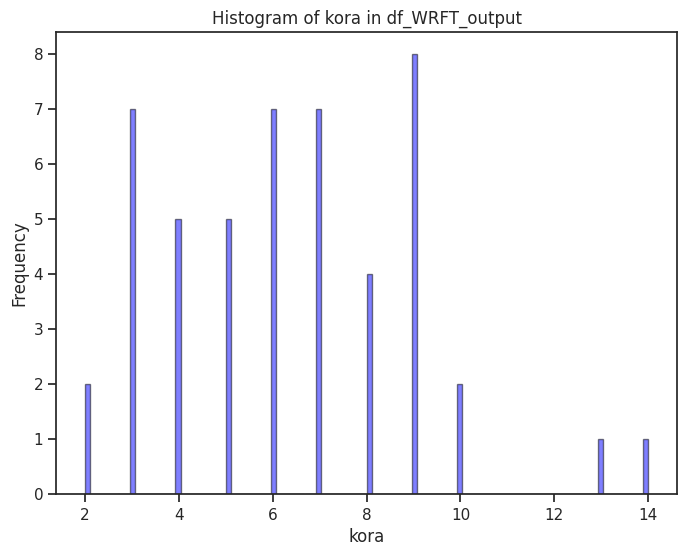

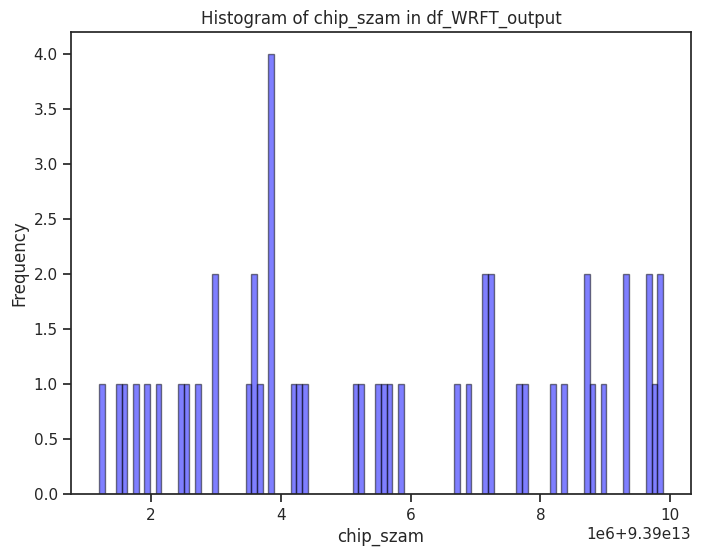

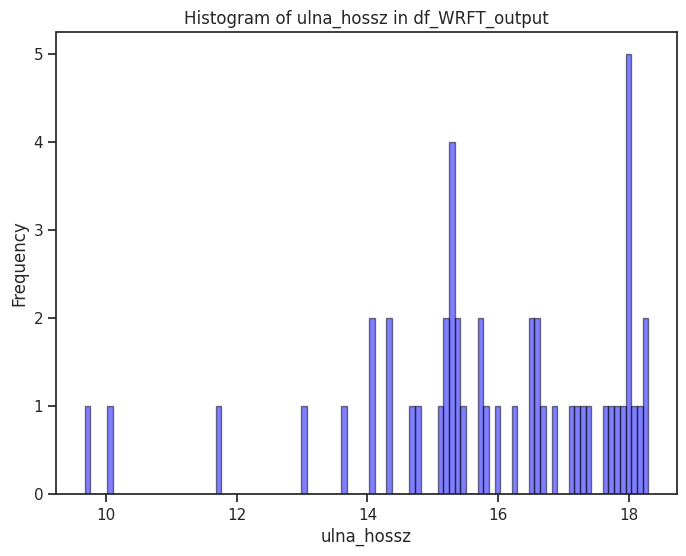

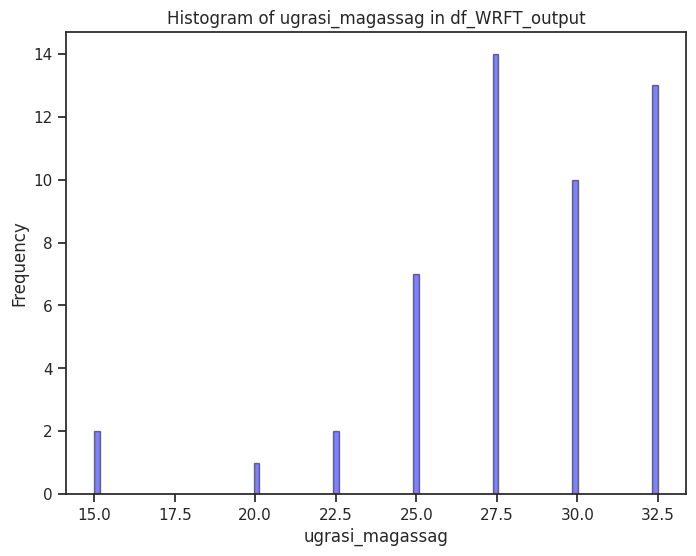

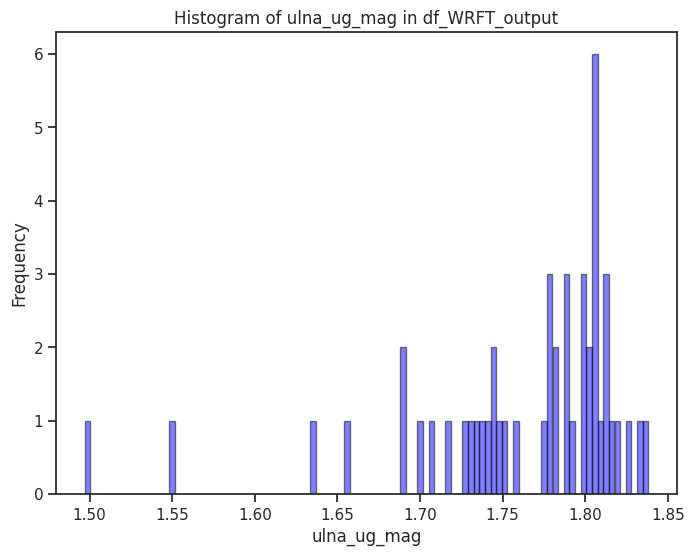

In [32]:
plot_histograms("df_WRFT_output")

In [33]:
dinfo(df_WRFT_output)


DataFrame oszlopainak statisztikái:


,#,Dtype,count,unique,top,freq,mean,std,min,25%,50%,75%,max,first,last,NaN_count,unique_top,unique_top_count
felvezeto,1,object,49,49,TM800418,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TM800418,UH881130,0,TM800418,1
nev,2,object,49,49,Dexter,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dexter,Hank,0,Dexter,1
fajta,3,object,49,15,Border collie,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kooikerhondje,Keverék,0,Border collie,25
nem,4,object,49,2,kan,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,kan,kan,0,kan,28
ivar,5,object,49,2,ivartalan,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ivartalan,ivaros,0,ivartalan,39
szuletesi_datum,6,object,49,47,2018-12-22,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-02-14,2022-05-02,0,2018-12-22,2
kora,7,int64,49.0,NaN,NaN,NaN,6.367347,2.713346,2.0,4.0,6.0,8.0,14.0,14,2,0,9,8
chip_szam,8,int64,49.0,NaN,NaN,NaN,93900005641658.515625,2734461.192587,93900001206699.0,93900003589833.0,93900005539134.0,93900008222471.0,93900009884426.0,93900005238999,93900008222471,0,93900005238999,1
ulna_hossz,9,float64,49.0,NaN,NaN,NaN,15.906735,1.99513,9.67,15.22,16.01,17.68,18.3,14.05,16.28,0,15.28,3
ugrasi_magassag,10,float64,49.0,NaN,NaN,NaN,28.112245,4.162413,15.0,27.5,27.5,32.5,32.5,25.0,27.5,0,27.5,14


In [34]:
li(df_WRFT_output)

,felvezeto,nev,fajta,nem,ivar,szuletesi_datum,kora,chip_szam,ulna_hossz,ugrasi_magassag,fajta_old,ulna_ug_mag
0,TM800418,Dexter,Kooikerhondje,kan,ivartalan,2010-02-14,14,93900005238999,14.05,25.0,Kooikerhondje,1.779359
1,NP950613,Jasper,Border collie,kan,ivartalan,2011-03-28,13,93900007189034,16.56,30.0,Border Collie,1.811594
2,UF830429,Angie,Border collie,szuka,ivartalan,2014-02-06,10,93900003827629,15.22,27.5,Border,1.806833
3,ZE801127,Alex,Border collie,kan,ivartalan,2014-04-22,10,93900003598960,17.95,32.5,Border Collie,1.810585
4,DP910919,Ashley,Border collie,szuka,ivartalan,2015-01-26,9,93900009738344,18.30,32.5,border collie,1.775956


használat: li(df)  # Használja az 'enter' változó értékét ha létezik és nagyobb mint 0, különben az összes sort megjeleníti vagy li(df, -1)


##Folytasd ezzel: Flyball_EFC_cleaning_XXXXXX.ipynb